<a href="https://colab.research.google.com/github/thanishka-aity/uber_ride_analysis/blob/main/Uber_ride_booking_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problem Statement for the Dataset:
The given dataset contains trip records of a business-related transportation log, including details such as trip start and end timestamps, locations, distances traveled, and trip purposes. The primary objective of analyzing this dataset is to gain insights into travel patterns, optimize route efficiency, and understand the nature of business trips.

# Key Objectives:
1. Trip Analysis:

    Identify the most frequent travel routes.
    Analyze trip duration and distance trends.
    Detect peak travel times for business activities.
2. Expense and Purpose Analysis:

    Evaluate travel expenses based on miles traveled.
    Categorize trips based on purpose (e.g., meetings, errands, customer visits).
    Identify missing or inconsistent trip purpose entries.
4. Anomalies and Data Quality:

    Handle missing or incorrect location entries (e.g., "Unknown Location").
    Standardize date-time formats.
    Identify and correct outliers or erroneous entries in mileage or timestamps.
4. Business Insights and Optimization:

    Assess the efficiency of travel routes.
    Recommend alternative travel strategies to reduce mileage and optimize costs.
    Identify potential improvements in travel planning

In [2]:
import pandas as pd # pandas libarary for data cleaning and data manipulation
import numpy as np  # numpy for numerical oprations
import matplotlib.pyplot as plt  # data visualisation
import seaborn as sns        # data visualisation
from datetime import datetime  # for handing date time data
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing  dataset
dataset=pd.read_csv("UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
dataset.info() # data basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [5]:
# fill Nan with not mention
dataset["PURPOSE"].fillna("Not Mention",inplace=True)

In [6]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not Mention
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
# change the data type of date columns

dataset["START_DATE"]=pd.to_datetime(dataset["START_DATE"],errors="coerce")
# errors = "coerce" if data have any null of format issue ,
# they are converted to NaT (Not a Time) instead of raising an error.

dataset["END_DATE"]=pd.to_datetime(dataset["END_DATE"],errors="coerce")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [9]:
# create new date and hour columns
dataset["date"]=pd.DatetimeIndex(dataset["START_DATE"]).date
dataset["time"]=pd.DatetimeIndex(dataset["START_DATE"]).hour
# creating new day-night columns with labels
dataset['day-night']=pd.cut(x=dataset['time'],
                            bins=[0,10,15,19,24],
                            labels=["morning","afternoon","evening","night"])
dataset.dropna(inplace=True) # drop nan
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not Mention,2016-01-02,1.0,morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,afternoon


# Data Visualization

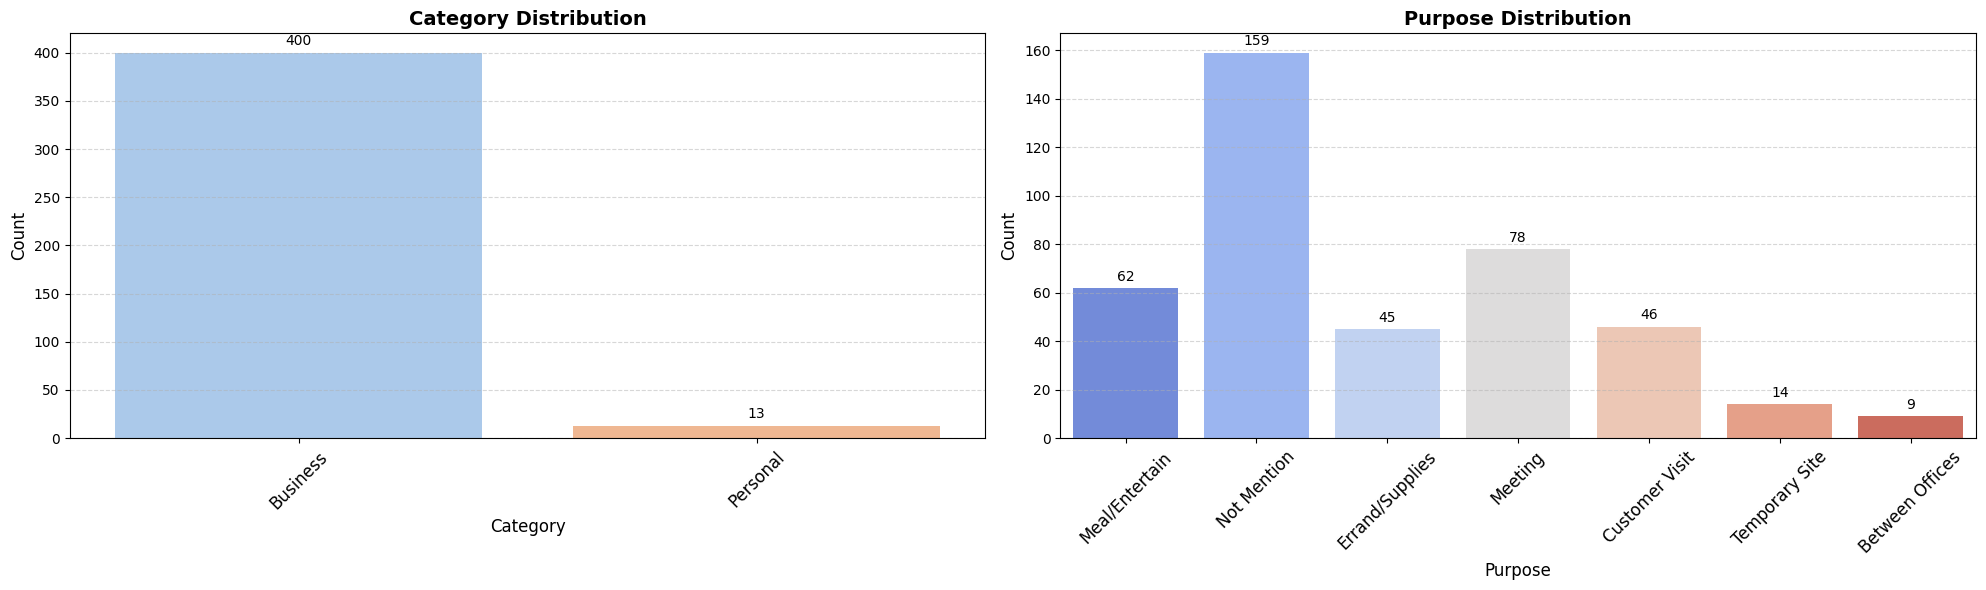

In [10]:
# Set overall figure size
plt.figure(figsize=(20, 6))

# First subplot: CATEGORY countplot
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x="CATEGORY", hue="CATEGORY", data=dataset, palette="pastel")
plt.xticks(rotation=45, fontsize=12)
plt.title("Category Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Adding value labels
for p in ax1.containers:
    ax1.bar_label(p, fmt='%d', fontsize=10, padding=3)

# Second subplot: PURPOSE countplot
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x="PURPOSE", hue="PURPOSE", data=dataset, palette="coolwarm")
plt.xticks(rotation=45, fontsize=12)
plt.title("Purpose Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Adding value labels
for p in ax2.containers:
    ax2.bar_label(p, fmt='%d', fontsize=10, padding=3)

# Adjust layout
plt.tight_layout()
plt.show()

### People book uber rides mostly for bussiness purposes.
### The highest values are not mention in dataset but the second highest purpose to book uber ride is meeting .

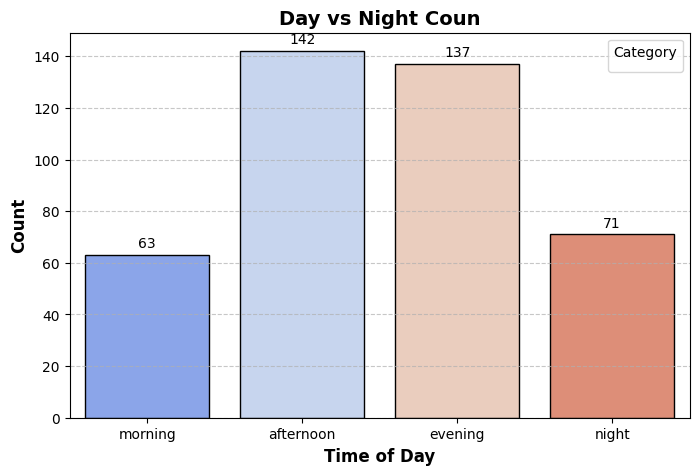

In [11]:
plt.figure(figsize=(8, 5))  # Set figure size

ax = sns.countplot(
    x="day-night",
    hue="day-night",
    data=dataset,
    palette="coolwarm",  # Set color palette
    edgecolor="black"  # Add edges to bars
)

# Add value labels on bars
for p in ax.containers:
    ax.bar_label(p, fmt='%d', fontsize=10, padding=3)

# Improve readability
plt.xlabel("Time of Day", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Day vs Night Coun", fontsize=14, fontweight='bold')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(title="Category", loc="upper right")  # Add legend with title
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for better readability

plt.show()

### People book Uber more during the afternoon and evening hours, with very little difference in ride bookings between the afternoon and evening hours.

In [12]:
# creating new column of month
dataset['MONTH']=pd.DatetimeIndex(dataset['START_DATE']).month
# creating month label
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)
mon = dataset.MONTH.value_counts(sort=False)

In [13]:
# transform Array into dataframe
df=pd.DataFrame({
    "MONTH":mon.values,
    "VALUE COUNT":dataset.groupby("MONTH",sort=False)["MILES"].max()
})
df

,MONTH,VALUE COUNT
MONTH,,
Jan,23,63.7
Feb,40,23.3
Mar,42,17.3
April,24,174.2
May,26,25.6
June,42,22.3
July,34,13.6
Aug,43,31.9
Sep,13,69.1


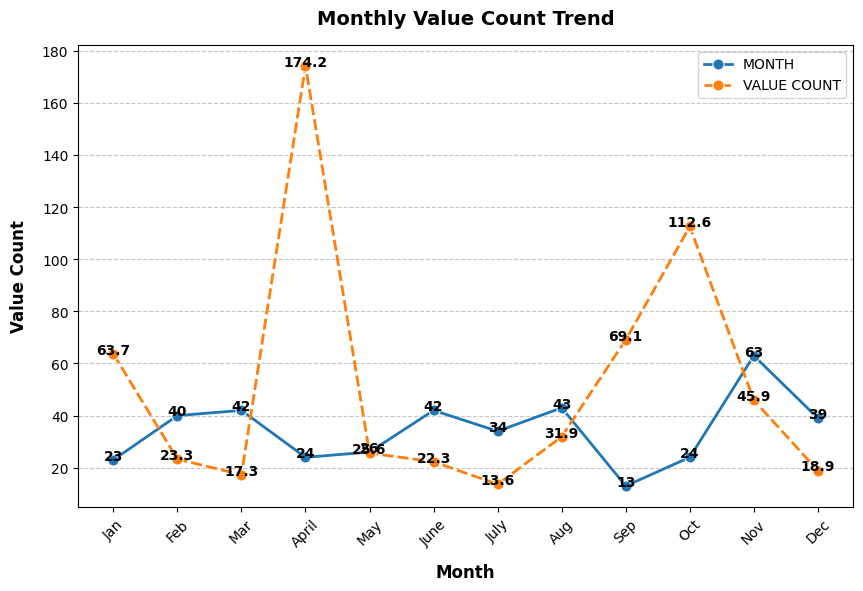

In [14]:
plt.figure(figsize=(10, 6))  # Set figure size

# Create line plot with enhancements
p = sns.lineplot(
    data=df,
    marker="o",  # Add markers at data points
    linewidth=2,  # Set line width
    markersize=8,  # Increase marker size
    palette="tab10"  # Set color palette
)

# Customize labels and title
p.set_xlabel("Month", fontsize=12, fontweight='bold', labelpad=10)
p.set_ylabel("Value Count", fontsize=12, fontweight='bold', labelpad=10)
p.set_title("Monthly Value Count Trend", fontsize=14, fontweight='bold', pad=15)

# adding values on
for ixd,value in enumerate(df["VALUE COUNT"]):
    plt.text(ixd,value,f'{value}',ha='center',fontsize=10,fontweight = 'bold')

for ixd,value in enumerate(df["MONTH"]):
    plt.text(ixd,value,f'{value}',ha='center',fontsize=10,fontweight = 'bold')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### Uber's ride booking numbers are low in September

In [15]:
# creating day column
dataset["day"]=dataset.START_DATE.dt.weekday
day_label = {
    0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'
}
dataset['day']=dataset['day'].map(day_label)

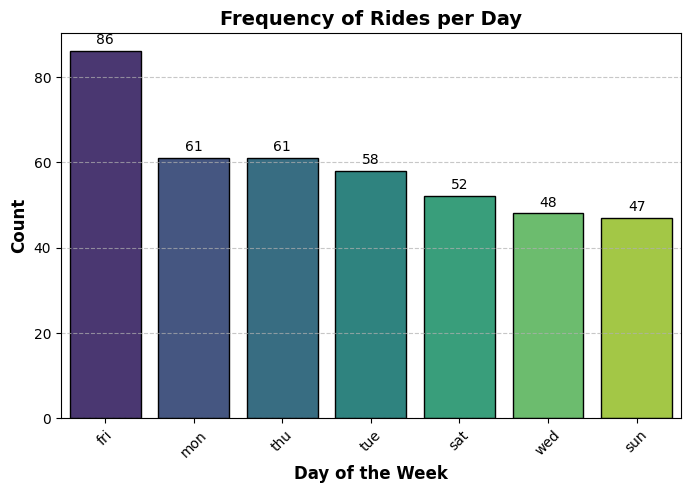

In [16]:
# Count occurrences of each day
day_label = dataset["day"].value_counts()

# Set figure size
plt.figure(figsize=(8, 5))

# Create a bar plot with enhancements
ax = sns.barplot(
    x=day_label.index,
    y=day_label.values,
    palette="viridis",  # Use a visually appealing color palette
    edgecolor="black"
)

# Add value labels on top of bars
for p in ax.containers:
    ax.bar_label(p, fmt='%d', fontsize=10, padding=3)

# Customize labels and title
plt.xlabel("Day of the Week", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.title("Frequency of Rides per Day", fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


### The count of booking Uber ride is high on Friday .

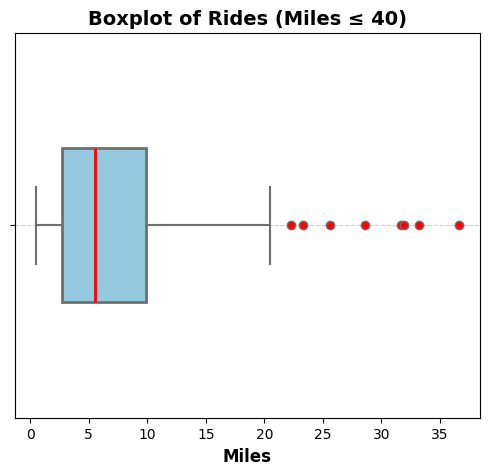

In [17]:
plt.figure(figsize=(6, 5))  # Set figure size

# Create a styled boxplot
sns.boxplot(
    x=dataset[dataset["MILES"] <= 40]["MILES"],
    color="skyblue",  # Choose a visually appealing color
    width=0.4,  # Adjust width for better appearance
    boxprops={"linewidth": 2},  # Thicker box border
    medianprops={"color": "red", "linewidth": 2},  # Highlight median
    whiskerprops={"linewidth": 1.5},  # Thicker whiskers
    capprops={"linewidth": 1.5},  # Thicker caps
    flierprops={"marker": "o", "markersize": 6, "markerfacecolor": "red"}  # Style outliers
)

# Customize labels and title
plt.xlabel("Miles", fontsize=12, fontweight='bold')
plt.title("Boxplot of Rides (Miles ≤ 40)", fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()


In [18]:
ride_miles=dataset[dataset["MILES"]<=40]["MILES"]

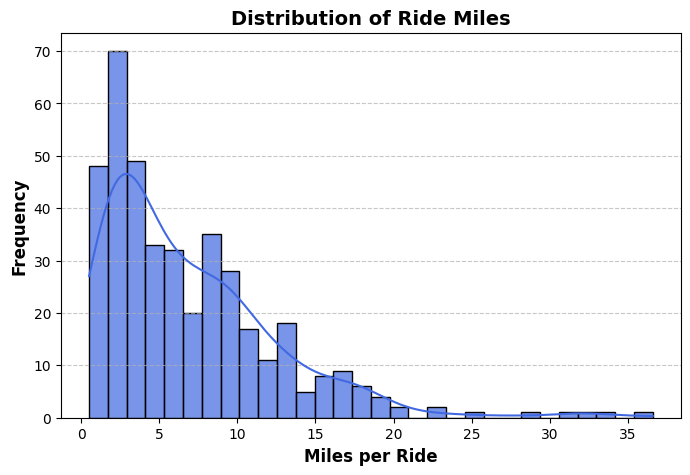

In [19]:
plt.figure(figsize=(8, 5))  # Set figure size

# Create an advanced histogram with KDE (Kernel Density Estimation)
sns.histplot(
    ride_miles,
    bins=30,  # Number of bins for better granularity
    kde=True,  # Overlay Kernel Density Estimate (smooth curve)
    color="royalblue",  # Set color
    edgecolor="black",  # Add borders to bars
    alpha=0.7  # Set transparency for better visibility
)

# Customize labels and title
plt.xlabel("Miles per Ride", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.title("Distribution of Ride Miles", fontsize=14, fontweight='bold')

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


### The frequency of booking Uber ride is high for short range. most people prefer Uber ride for short range

# Uber Rides Booking - Key Insights Summary
Our analysis of the Uber rides booking dataset has uncovered several key trends in user behavior and ride preferences:

## 🚗 Business Travel Dominance
A significant portion of Uber rides are booked for business purposes, especially for meetings.

## 🕒 Peak Booking Hours
Afternoon and evening rides see the highest demand, suggesting increased travel needs during these periods.

## 📅 Monthly Trends
Lowest bookings: September experiences a drop in ride bookings.
Highest bookings: November sees a noticeable increase in ride activity.

## 📆 Day-Wise Ride Frequency
Fridays record the highest number of bookings, likely due to increased social outings and work-related travel.

## 📍 Distance Preference
Most users opt for short-distance trips, with a majority of rides covering around 10 km or less.

These insights provide valuable understanding of Uber users' travel patterns, helping in optimizing service availability, pricing, and promotional strategies. 🚀